In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
sim_time = [14.911, 30.602, 231.811, 336.366]
sim_points = [15, 21, 33, 35]

em_time = [0.001, 0.001, 555.356]#, 662.358]
em_points = [15, 35, 8509]#, 42781]

In [3]:
def curve(x, a, b):
    return a * (2 ** (b * x))

Parameters for simulator curve: [0.72909768 0.25257301]


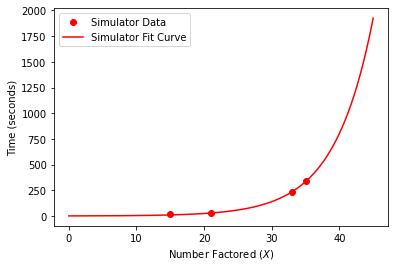

In [5]:
# Fit a curve to the data.
# em_params = curve_fit(f=curve, xdata=em_points, ydata=em_time, p0=[1, 1], bounds=(-np.inf, np.inf))[0]
sim_params = curve_fit(f=curve, xdata=sim_points, ydata=sim_time, p0=[1, 1], bounds=(-np.inf, np.inf))[0]

# Record the parameters of the fit curve.
# print('Parameters for emulator curve:', em_params)
print('Parameters for simulator curve:', sim_params)

# Plot the raw data points and the fit curve.
domain = np.linspace(0, 45, 1000)
fig = plt.figure()
# plt.plot(em_points, em_time, 'ok', label='Emulator Data')
# plt.plot(domain, curve(domain, em_params[0], em_params[1]), 'k', label='Emulator Fit Curve')
plt.plot(sim_points, sim_time, 'or', label='Simulator Data')
plt.plot(domain, curve(domain, sim_params[0], sim_params[1]), 'r', label='Simulator Fit Curve')
plt.xlabel('Number Factored ($X$)')
plt.ylabel('Time (seconds)')
plt.legend(loc='best')
plt.savefig('../Plots/shors_interp.png', dpi=600)